1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [5]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [6]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
X_st[1] = (X[1] - X1_mean) / X1_std
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [7]:
X_st[2] = calc_std_feat(X[2])

In [8]:
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [10]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [15]:
def eval_model_reg2_plot(X, y, steps, iterations, alpha=1e-4):
    result_lambda=[]
    W_0=[]
    W_1=[]
    W_2=[]
    W_3=[]
    x_label_list = np.geomspace(10**(-1),(10**(-(steps))),num=steps)
    positions = [i for i in range (0,steps-1)]
    for i in range(steps):
        lambda_= np.geomspace(10**(-1),(10**(-(steps))),num=steps)[i]
        np.random.seed(42)
        W = np.random.randn(X.shape[0])
        n = X.shape[1]
        for j in range(1, iterations+1):
            y_pred = np.dot(W, X)
            err = calc_mse(y, y_pred)
            W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        result_lambda.append((W,lambda_))
        W_0.append(W[0])
        W_1.append(W[1])
        W_2.append(W[2])
        W_3.append(W[3])
    plt.plot(W_0)
    plt.plot(W_1)
    plt.plot(W_2)
    plt.plot(W_3)
    plt.yscale("log") 
    plt.xlabel (xlabel="Lambda L2")
    plt.xticks(positions,x_label_list) 
    return result_lambda, plt.show

([(array([54.66666667,  5.3118901 ,  2.25660813,  3.88109191]), 0.1),
  (array([57.11442786,  6.0088442 ,  1.55430443,  4.08144793]), 0.01),
  (array([57.37131434,  6.11038803,  1.44200443,  4.11257825]), 0.001),
  (array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451]), 0.0001),
  (array([57.399713  ,  6.12209394,  1.42892499,  4.11620609]), 1e-05),
  (array([57.3999713 ,  6.12220087,  1.42880539,  4.11623926]), 1e-06),
  (array([57.39999713,  6.12221157,  1.42879343,  4.11624258]), 1e-07),
  (array([57.39999971,  6.12221264,  1.42879223,  4.11624291]), 1e-08)],
 <function matplotlib.pyplot.show(*args, **kw)>)

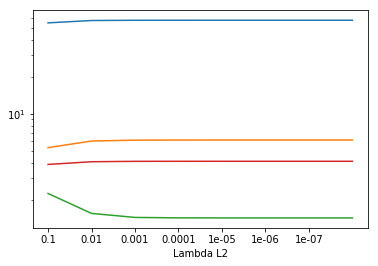

In [12]:
eval_model_reg2_plot(X_st, y,steps=8, iterations=5000, alpha=1e-2)

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, если исходный признак нормально распределен, то последовательно применять функции к одному и тому же набору данных ничего не мешает, но необходимо учитывать что итоговые значения зависеть будут только от обработки, примененной последней.